# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random #N=100000 raises an error
N = 10000 #number of rounds, later change to 1000 and 500 and compare result to that of UCB
d = 10 #assumption is that each ad has a fixed conversion rate
ads_selected = []
numbers_of_rewards_1 = [0] * d #number of times each ad gets a reward of 1
numbers_of_rewards_0 = [0] * d #number of times each ad gets a reward of 0
total_reward = 0 #accumulated reward, initialised to zero for now

for n in range(0, N):#Main for Loop
  ad = 0   
  max_random = 0
  for i in range(0, d):
    #step 2
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    #step 3
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

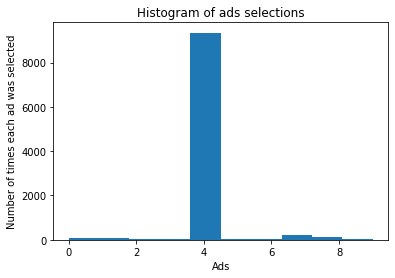

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [ ]:
#it finds the best ad in 10000 rounds
#it does well with 1000 rounds
#500 rounds also does better when compared to UCB

In [ ]:
#Best ad with the highest conversion rate is ad 4

In [ ]:
#With respect to which algorithm to choose, try both algorithms and choose the better 
#but more often than not, TS works better